In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")


In [ ]:
ticker = "RELIANCE.NS"

data = yf.download(
    ticker,
    start="2018-01-01",
    end="2024-01-01",
    progress=False
)

data = data[["Close"]]
data.rename(columns={"Close": "price"}, inplace=True)

data.head()


/tmp/ipython-input-1069048306.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


Price,price
Ticker,RELIANCE.NS
Date,
2018-01-01,401.864777
2018-01-02,402.483215
2018-01-03,404.095520
2018-01-04,406.525055
2018-01-05,407.828156


In [ ]:
data.columns

MultiIndex([('price', 'RELIANCE.NS')],
           names=['Price', 'Ticker'])

In [ ]:
data['price']['RELIANCE.NS']

,RELIANCE.NS
Date,
2018-01-01,401.864777
2018-01-02,402.483215
2018-01-03,404.095520
2018-01-04,406.525055
2018-01-05,407.828156
...,...
2023-12-22,1273.102173
2023-12-26,1279.554443
2023-12-27,1283.922119


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


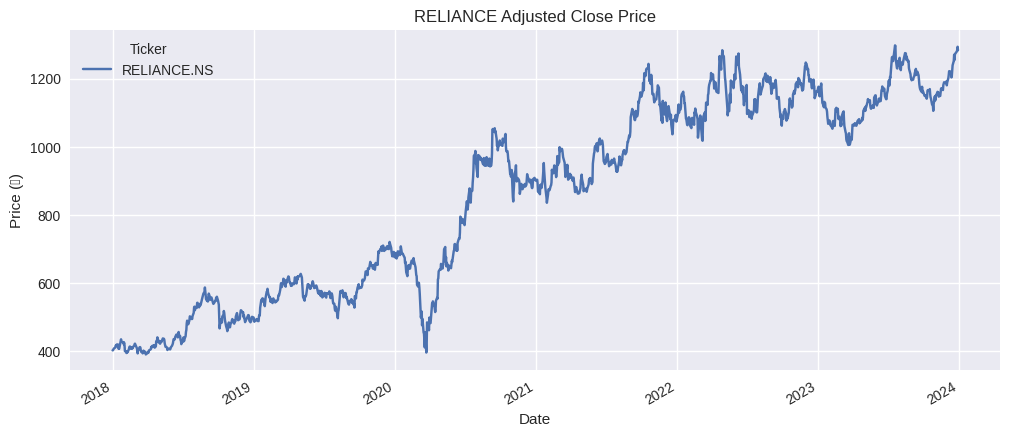

In [ ]:
data["price"].plot(figsize=(12,5))
plt.title("RELIANCE Adjusted Close Price")
plt.xlabel("Date")
plt.ylabel("Price (₹)")
plt.show()

In [ ]:
data["log_return"] = np.log(data["price"] / data["price"].shift(1))
returns = data["log_return"].dropna()

returns.head()

,log_return
Date,
2018-01-02,0.001538
2018-01-03,0.003998
2018-01-04,0.005994
2018-01-05,0.003200
2018-01-08,0.005724


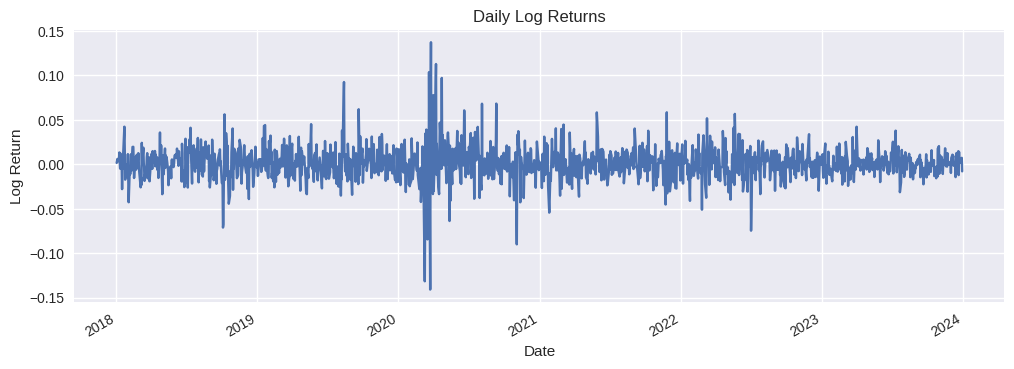

In [ ]:
returns.plot(figsize=(12,4))
plt.title("Daily Log Returns")
plt.ylabel("Log Return")
plt.show()

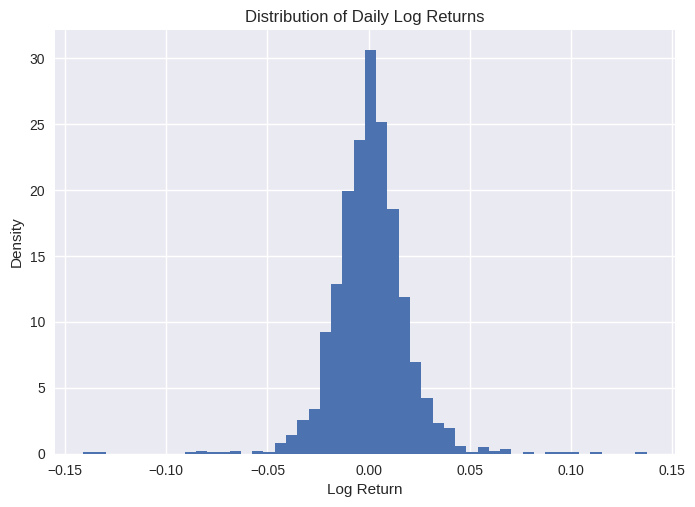

In [ ]:
plt.hist(returns, bins=50, density=True)
plt.title("Distribution of Daily Log Returns")
plt.xlabel("Log Return")
plt.ylabel("Density")
plt.show()

In [ ]:
daily_vol = returns.std()
daily_vol


0.01873567911292872

In [ ]:
annual_vol = daily_vol * np.sqrt(252)
annual_vol

np.float64(0.2974196854602998)

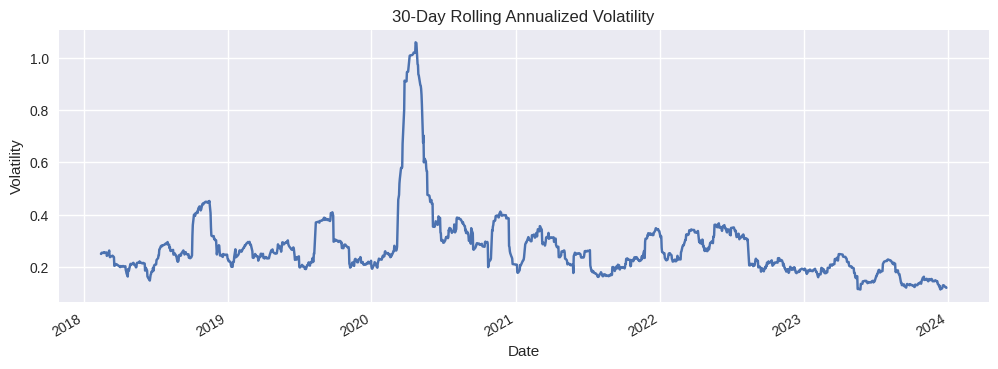

In [ ]:
rolling_vol = returns.rolling(30).std() * np.sqrt(252)

rolling_vol.plot(figsize=(12,4))
plt.title("30-Day Rolling Annualized Volatility")
plt.ylabel("Volatility")
plt.show()

In [ ]:
S0 = data["price"].iloc[-1]      # Current spot price
sigma = annual_vol               # Annual volatility
S0,sigma

(Ticker
 RELIANCE.NS    1282.979126
 Name: 2023-12-29 00:00:00, dtype: float64,
 np.float64(0.2974196854602998))

In [ ]:
from scipy.stats import skew, kurtosis

skewness = skew(returns)
kurt = kurtosis(returns, fisher=False)

skewness, kurt

(np.float64(0.04090934913200937), np.float64(12.044518187004464))